<a href="https://colab.research.google.com/github/faranak-jahedi/ML-Projects/blob/main/ML_Lab_Excercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> A Study of Factors related to Cardiovascular risk in Adults </center>


The objective of this notebook is to show some of the essential steps of a workflow for building predictive models. The notebook provides a few examples of each step and it is only a very thin slice of what a complete analysis would consist of.

The workflow includes:
1. **Problem Definition**:  A clear definition of the problem enables us to identify the appropriate data to gather and technique(s) to use in order to solve the problem. For many problems this many require background reading, discussion with domain experts, and layered problem specification.
2. **Data Gathering**: We have to know which data to use, where to gather them, and how to make them useful to solve our problem. In many cases, data from multiple sources can provide deeper insights.
3. **Data Cleaning and Wrangling**: Raw data are generally incomplete, inconsistent, and contain many errors. Thus, we need to prepare the data for further processing. Data wrangling is the process of cleaning, structuring, and enriching raw data into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes, such as analytics.
4. **Exploratory Data Analysis**: Exploratory data analysis (EDA) is an approach of performing initial investigations on our data. EDA normally has descriptive nature and uses graphical statistics to discover patterns, to identify anomalies, to test hypothesis, and to check assumptions regarding our data.

5. **Data Modelling**:  Data modelling involves selecting and optiming the machine learning models that generate the best predictive performance based on the data we have.
6. **Prediction**: Once we have developed the best predictive model, we can deploy it to make predictions.


References :
1. https://github.com/richasethi3/CVD_Prediction
2. https://www.kaggle.com/ar2017/titanic-end-to-end-ml-workflow-top-7/notebook
3. https://github.com/bruceMacLeod/COS475-575/blob/main/Assignment/HypertensionV1.ipynb

# Problem Definition

Cardiovascular disease (CVD) is a general term for conditions affecting the heart or blood vessels. It's usually associated with a build-up of fatty deposits inside the arteries (atherosclerosis) and an increased risk of blood clots. It can also be associated with damage to arteries in organs such as the brain, heart, kidneys and eyes.

CVD is one of the main causes of death and disability in the USA, but it can often largely be prevented by leading a healthy lifestyle.

The exact cause of CVD isn't clear, but there are lots of things that can increase your risk of getting it. These are called "risk factors". The more risk factors you have, the greater your chances of developing CVD.

1.  **High blood pressure** (hypertension) is one of the most important risk factors for CVD. If your blood pressure is too high, it can damage your blood vessels.

2.   **Smoking** Smoking and other tobacco use is also a significant risk factor for CVD. The harmful substances in tobacco can damage and narrow your blood vessels.

3.   **High cholesterol** Cholesterol is a fatty substance found in the blood. If you have high cholesterol, it can cause your blood vessels to narrow and increase your risk of developing a blood clot.


4.   **Diabetes** Diabetes is a lifelong condition that causes your blood sugar level to become too high. High blood sugar levels can damage the blood vessels, making them more likely to become narrowed.

5.    **Inactivity** If you don't exercise regularly, it's more likely that you'll have high blood pressure, high cholesterol levels and be overweight. All of these are risk factors for CVD.

6.    **Being overweight or obese** Being overweight or obese increases your risk of developing diabetes and high blood pressure, both of which are risk factors for CVD.

We apply the tools of machine learning to predict the factors that are associated with cardiovascular disease in adults.



# Data Gathering and Import


In [ ]:
#Before moving to the next section, we need to import all packages required to do the analysis by calling the following:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import tarfile
import urllib
import logging

from functools import reduce

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix



### Gathering and Importing Data

We need some functions to help automate the large number of files

In [ ]:
def download_data(data_dir, file_list):

    if not os.path.exists(data_dir):
        os.makedirs(data_dir)

    for (year, data_file) in file_list:
        sub_dir = os.path.join(data_dir, year)
        if not os.path.exists(sub_dir):
            os.makedirs(sub_dir)
        url = 'http://wwwn.cdc.gov/Nchs/Nhanes/{0}/{1}.XPT'.format(year, data_file)
        file_name = os.path.join(sub_dir, data_file + '.XPT')
        if not os.path.exists(file_name):
            logging.info('Downloading: {}'.format(url))
            urllib.request.urlretrieve(url, file_name)
        else:
            logging.info('File exists: {}'.format(file_name))

def read_data_from_row(offset,ncols,col_list):
    df = pd.DataFrame()
    for i in range(ncols):
        filename = LOCAL_DATA_PATH + file_list[offset + i][0] + "/" + file_list[offset + i][1] + ".XPT"
        one_year_df = pd.read_sas(filename)
        df = pd.concat([df,one_year_df], axis=0)
    df = df.loc[:, col_list]
    return df

In [ ]:
file_list = [
        ('2015-2016', 'DEMO_I'),    ('2017-2018', 'DEMO_J'),  ('2013-2014', 'DEMO_H'),
        ('2015-2016', 'BPX_I'),     ('2017-2018', 'BPX_J'),   ('2013-2014', 'BPX_H'),
        ('2015-2016', 'BMX_I'),     ('2017-2018', 'BMX_J') ,  ('2013-2014', 'BMX_H'),
        ('2015-2016', 'TCHOL_I'),   ('2017-2018', 'TCHOL_J'), ('2013-2014', 'TCHOL_H'),
        ('2015-2016', 'DIQ_I'),     ('2017-2018', 'DIQ_J'),   ('2013-2014', 'DIQ_H'),
        ('2015-2016', 'SMQ_I'),     ('2017-2018', 'SMQ_J'),   ('2013-2014', 'SMQ_H'),
        ('2015-2016', 'MCQ_I'),     ('2017-2018', 'MCQ_J'),   ('2013-2014', 'MCQ_H'),
        ('2015-2016', 'HDL_I'),     ('2017-2018', 'HDL_J'),   ('2013-2014', 'HDL_H'),
        ('2015-2016', 'TRIGLY_I'),  ('2017-2018', 'TRIGLY_J'),('2013-2014', 'TRIGLY_H'),
        ('2015-2016', 'KIQ_U_I'),   ('2017-2018', 'KIQ_U_J'), ('2013-2014', 'KIQ_U_H')
    ]

demo_cols = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'INDFMIN2']
bpx_cols = ['SEQN', 'BPXPULS','BPXSY1', 'BPXDI1']
bmx_cols = ['SEQN', 'BMXBMI', 'BMXWAIST']
tchol_cols = ['SEQN', 'LBXTC']
diab_cols = ['SEQN', 'DIQ010']
smoking_cols = ['SEQN', 'SMQ020']
heart_cols = ['SEQN', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F', 'MCQ300A']
hdl_cols = ['SEQN', 'LBDHDD']
trigly_cols = ['SEQN', 'LBXTR', 'LBDLDL']
kidney_cols = ['SEQN', 'KIQ022']


In [ ]:
LOCAL_DATA_PATH = os.path.join("datasets", "nhanes") + "/"

download_data(LOCAL_DATA_PATH, file_list)

In [ ]:
demo_df = read_data_from_row(0,3,demo_cols)
bpx_df = read_data_from_row(3,3,bpx_cols)
bmx_df = read_data_from_row(6,3,bmx_cols)
tchol_df = read_data_from_row(9,3,tchol_cols)
diab_df = read_data_from_row(12,3,diab_cols)
smoking_df = read_data_from_row(15,3,smoking_cols)
heart_df = read_data_from_row(18,3,heart_cols)
hdl_df = read_data_from_row(21,3,hdl_cols)
trigly_df = read_data_from_row(24,3,trigly_cols)
kidney_df = read_data_from_row(27,3,kidney_cols)

<ipython-input-6-96a0d1a48f68>:22: UserWarning: xport file may be corrupted.
  one_year_df = pd.read_sas(filename)


### Merge the datatables into a single table

In [ ]:
pdList = [demo_df, bpx_df, bmx_df, hdl_df, trigly_df, tchol_df, diab_df,
          kidney_df, heart_df, smoking_df]
cvd_df = reduce(lambda x,y: pd.merge(x,y, on='SEQN', how='outer'), pdList)
print(cvd_df)

          SEQN  RIAGENDR  RIDAGEYR  RIDRETH1  INDFMIN2  BPXPULS  BPXSY1  \
0      83732.0       1.0      62.0       3.0      10.0      1.0   128.0   
1      83733.0       1.0      53.0       3.0       4.0      1.0   146.0   
2      83734.0       1.0      78.0       3.0       5.0      1.0   138.0   
3      83735.0       2.0      56.0       3.0      10.0      1.0   132.0   
4      83736.0       2.0      42.0       4.0       7.0      1.0   100.0   
...        ...       ...       ...       ...       ...      ...     ...   
29395  83727.0       1.0      26.0       2.0      77.0      1.0   110.0   
29396  83728.0       2.0       2.0       1.0       8.0      1.0     NaN   
29397  83729.0       2.0      42.0       4.0       7.0      1.0   136.0   
29398  83730.0       1.0       7.0       2.0       6.0      1.0     NaN   
29399  83731.0       1.0      11.0       5.0      15.0      1.0    94.0   

       BPXDI1  BMXBMI  BMXWAIST  ...  LBXTC  DIQ010  KIQ022  MCQ160B  MCQ160C  \
0        70.0    2

In [ ]:
#rename the columns to make the headers to something more meaningful
cvd_df.rename(columns={'SEQN': 'seqn', 'RIAGENDR': 'gender', 'RIDAGEYR':'age',
                   'RIDRETH1':'ethnicity', 'INDFMIN2':'income', 'BPXPULS':'pulse_regular',
                   'BPXSY1':'sysbp', 'BPXDI1':'diabp', 'BMXBMI':'bmi',
                   'BMXWAIST':'waistcircum', 'LBDHDD':'hdl', 'LBXTR':'trigly',
                   'LBDLDL':'ldl', 'LBXTC':'totchol', 'DIQ010':'diabetes',
                   'KIQ022':'kidney_fail', 'MCQ160B':'congestive_fail', 'MCQ160C':'coronary_disease',
                   'MCQ160D':'angina', 'MCQ160E':'heart_attack',
                   'MCQ160F':'stroke', 'MCQ300A':'fam_history', 'SMQ020':'smoking'}, inplace=True)
cvd_df.set_index('seqn', inplace=True)
cvd_df.head()

,gender,age,ethnicity,income,pulse_regular,sysbp,diabp,bmi,waistcircum,hdl,...,totchol,diabetes,kidney_fail,congestive_fail,coronary_disease,angina,heart_attack,stroke,fam_history,smoking
seqn,,,,,,,,,,,,,,,,,,,,,
83732.0,1.0,62.0,3.0,10.0,1.0,128.0,70.0,27.8,101.1,46.0,...,173.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
83733.0,1.0,53.0,3.0,4.0,1.0,146.0,88.0,30.8,107.9,63.0,...,265.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
83734.0,1.0,78.0,3.0,5.0,1.0,138.0,46.0,28.8,116.5,30.0,...,229.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
83735.0,2.0,56.0,3.0,10.0,1.0,132.0,72.0,42.4,110.1,61.0,...,174.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,9.0,2.0
83736.0,2.0,42.0,4.0,7.0,1.0,100.0,70.0,20.3,80.4,53.0,...,204.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


###  Exploring Data Structure and Features
Before performing data analysis, we often need to know the structure of our data. Therefore, we perform the following:
- Viewing a small part of our datasets
- Viewing data shape
- Describing the features contained in the datasets

In [ ]:
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29400 entries, 83732.0 to 83731.0
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            29400 non-null  float64
 1   age               29400 non-null  float64
 2   ethnicity         29400 non-null  float64
 3   income            28474 non-null  float64
 4   pulse_regular     27106 non-null  float64
 5   sysbp             20619 non-null  float64
 6   diabp             20619 non-null  float64
 7   bmi               25816 non-null  float64
 8   waistcircum       24575 non-null  float64
 9   hdl               21618 non-null  float64
 10  trigly            8703 non-null   float64
 11  ldl               8612 non-null   float64
 12  totchol           21618 non-null  float64
 13  diabetes          28241 non-null  float64
 14  kidney_fail       17057 non-null  float64
 15  congestive_fail   15312 non-null  float64
 16  coronary_disease  15312 non-nu

In [ ]:
#count and find the percentage of null values and concatenat the results
missing = pd.concat([cvd_df.isnull().sum(), 100*cvd_df.isnull().mean()], axis=1)
missing.columns = ['count', 'percentage']
missing.sort_values(by='count', ascending=False)

,count,percentage
ldl,20788,70.707483
trigly,20697,70.397959
fam_history,14088,47.918367
stroke,14088,47.918367
heart_attack,14088,47.918367
angina,14088,47.918367
coronary_disease,14088,47.918367
congestive_fail,14088,47.918367
kidney_fail,12343,41.982993
smoking,11439,38.908163


# Data Cleaning and Wrangling

## Starting with the missing values

In [ ]:
cvd_df.shape

(29400, 22)

In [ ]:
#filering out the ldl null values from the dataset
cvd_df = cvd_df[cvd_df['ldl'].notna()].reset_index(drop=True)

In [ ]:
cvd_df.shape

(8612, 22)

In [ ]:
#look at the count and percentage of missing values again
missing = pd.concat([cvd_df.isnull().sum(), 100*cvd_df.isnull().mean()], axis=1)
missing.columns = ['count', 'percentage']
missing.sort_values(by='count', ascending=False)

,count,percentage
fam_history,2254,26.172782
stroke,2254,26.172782
heart_attack,2254,26.172782
angina,2254,26.172782
coronary_disease,2254,26.172782
congestive_fail,2254,26.172782
kidney_fail,1501,17.429169
smoking,1141,13.248955
sysbp,709,8.232699
diabp,709,8.232699


Taking out the missing ldl values has taken care of missing trigly values and the rest of the missing columns as well.

In [ ]:
cvd_df = cvd_df[cvd_df['heart_attack'].notna()].reset_index(drop=True)
#look at the count and percentage of missing values again
missing = pd.concat([cvd_df.isnull().sum(), 100*cvd_df.isnull().mean()], axis=1)
missing.columns = ['count', 'percentage']
missing.sort_values(by='count', ascending=False)

,count,percentage
sysbp,540,8.493237
diabp,540,8.493237
waistcircum,304,4.781378
pulse_regular,203,3.192828
income,176,2.768166
bmi,77,1.211073
gender,0,0.000000
kidney_fail,0,0.000000
fam_history,0,0.000000
stroke,0,0.000000


This has resulted in reduction of our dataset by over 75%. Let's impute the rest of the missing sysbp, diabp, bmi and waistcircum columns by the median. Impute pulse_regular by mode, and forward fill the income column.

In [ ]:
cvd_df.shape

(6358, 22)

In [ ]:
cvd_df[['sysbp', 'diabp', 'bmi', 'waistcircum']] = cvd_df[['sysbp', 'diabp', 'bmi',
                                                           'waistcircum']].fillna(cvd_df[['sysbp', 'diabp',
                                                                                          'bmi', 'waistcircum']].median())

In [ ]:
cvd_df['pulse_regular'].fillna(cvd_df['pulse_regular'].mode()[0], inplace=True)

In [ ]:
cvd_df['income'].fillna(method='ffill', inplace=True)

In [ ]:
cvd_df.dtypes

gender              float64
age                 float64
ethnicity           float64
income              float64
pulse_regular       float64
sysbp               float64
diabp               float64
bmi                 float64
waistcircum         float64
hdl                 float64
trigly              float64
ldl                 float64
totchol             float64
diabetes            float64
kidney_fail         float64
congestive_fail     float64
coronary_disease    float64
angina              float64
heart_attack        float64
stroke              float64
fam_history         float64
smoking             float64
dtype: object

In [ ]:
dtype_cols = [col for col in cvd_df.columns if col not in ['bmi', 'waistcircum']]

for col in dtype_cols:
    cvd_df[col] = cvd_df[col].astype('int')
cvd_df.dtypes

gender                int64
age                   int64
ethnicity             int64
income                int64
pulse_regular         int64
sysbp                 int64
diabp                 int64
bmi                 float64
waistcircum         float64
hdl                   int64
trigly                int64
ldl                   int64
totchol               int64
diabetes              int64
kidney_fail           int64
congestive_fail       int64
coronary_disease      int64
angina                int64
heart_attack          int64
stroke                int64
fam_history           int64
smoking               int64
dtype: object

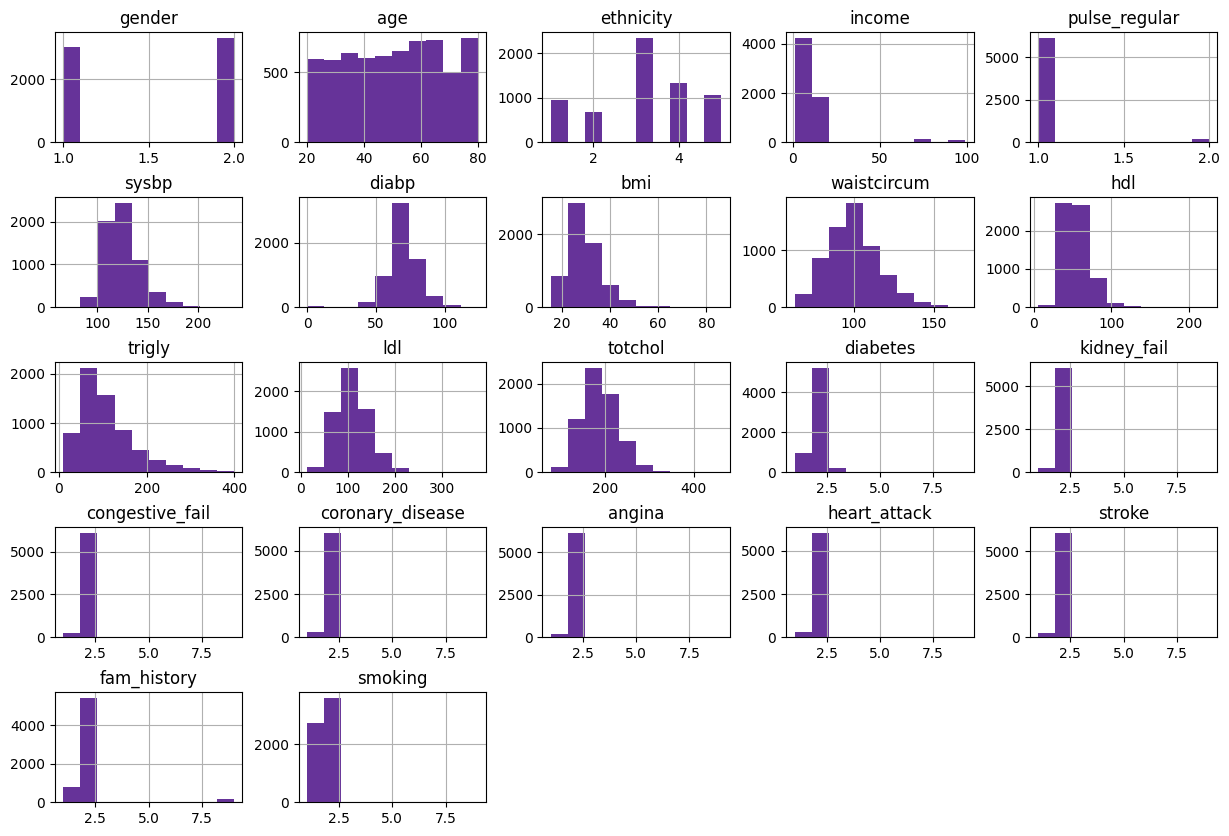

In [ ]:
#let's get the histograms to get an idea of their distributions
cvd_df.hist(figsize=(15, 10), color='rebeccapurple')
plt.subplots_adjust(hspace=0.5)
plt.show()

### filter out rows, columns, recode

In [ ]:
def hyper(sbp, dbp):
    if ((sbp <= 130) and (dbp <= 80)):
        return 0
    else:
        return 1

In [ ]:
#def a function which takes different heart condions as input and returns 1 if either one is true
#this is going to be our target
def CVD(heart_1, heart_2, heart_3, heart_4, heart_5):
    if ((heart_1 == 1) or (heart_2 == 1) or (heart_3 == 1)
       or (heart_4 == 1) or (heart_5 == 1)):
        return 1
    else:
        return 0

In [ ]:
def cvd_recode_values(cvd_df):
    #replace the 1(male) from the original dataset to 0 and 2(female) to 1
    cvd_df['gender'].replace({1: 0, 2: 1}, inplace=True)

    # replace 13(under $20,000) by 4($15,000 to $19,999)
    #replace 12(over $20,000), 77(refused) and 99(don't know) by mode($25,000 to $34,999).
    cvd_df['income'].replace({13: 4, 12: 6, 77: 6, 99: 6}, inplace=True)

    #Here 1 means the individual has been told they have diabetes, 2 means no diabetes, 3 means borderline and 9 stands for refused
    #replace 3 by 1 and 9 by 2
    cvd_df['diabetes'].replace({3: 1, 9: 2}, inplace=True)

    #Here 1 means the individual has had kidney failure, 2 means no kidney failure and 9 stands for refused
    #replace 9 by 2
    cvd_df['kidney_fail'].replace({9: 2}, inplace=True)

    # Here 1 means the individual has had congestive heart failure, 2 means no congestive heart failure and 9 stands for refused.
    #replace 9 by 2
    cvd_df['congestive_fail'].replace({9: 2}, inplace=True)

    #Here 1 means the individual has had coronary heart disease, 2 means no congestive coronary heart disease and 9 stands for refused.
    cvd_df['coronary_disease'].replace({9: 2, 7: 2}, inplace=True)

    #Here 1 means the individual has had angina, 2 means no angina and 9 stands for refused.
    cvd_df['angina'].replace({9: 2}, inplace=True)

    # Here 1 means the individual has had heart attack, 2 means no heart attack and 9 stands for refused.
    #replace 9 by 2
    cvd_df['heart_attack'].replace({9: 2}, inplace=True)

    #Here 1 means the individual has had stroke, 2 means no stroke and 9 stands for refused.
    #replace 9 by 2
    cvd_df['stroke'].replace({9: 2}, inplace=True)

    #Here 1 means the individual has family history of heart disease, 2 means no family history of heart disease, 7 means don't know and 9 stands for refused.
    #replace 9 and 7 by 2
    cvd_df['fam_history'].replace({9: 2, 7: 2}, inplace=True)

    #Here 1 means the individual smokes, 2 means no smoking, 7 means don't know and 9 stands for refused.
    #replace 9 and 7 by 2
    cvd_df['smoking'].replace({9: 2, 7: 2}, inplace=True)
    return cvd_df


In [ ]:
def cvd_add_attributes(cvd_df):
    if ('congestive_fail' in cvd_df.columns) &  ('coronary_disease' in cvd_df.columns) & \
       ('angina' in cvd_df.columns) & ('heart_attack' in cvd_df.columns) & \
       ('stroke' in cvd_df.columns) :
       cvd_df['CVD_risk'] = cvd_df.apply(lambda x: CVD(x['congestive_fail'], x['coronary_disease'],
                                         x['angina'], x['heart_attack'],
                                         x['stroke']), axis=1)
    if ('sysbp' in cvd_df.columns) & ('diabp' in cvd_df.columns) :
       cvd_df['hypertension_cat'] = cvd_df.apply(lambda x : hyper(x['sysbp'], x['diabp']), axis=1)
    return cvd_df

In [ ]:
def cvd_trim_rows(cvd_df):
    # only want to do the analysis on adults
    if ('age' in cvd_df.columns):
        cvd_df = cvd_df[cvd_df.age >=20]
    return cvd_df

In [ ]:
def cvd_drop_columns(cvd_df):
        if ('congestive_fail' in cvd_df.columns) &  ('coronary_disease' in cvd_df.columns) & \
           ('angina' in cvd_df.columns) & ('heart_attack' in cvd_df.columns) & \
           ('stroke' in cvd_df.columns) :
            cvd_df = cvd_df.drop(columns=['congestive_fail', 'coronary_disease', 'angina', 'heart_attack', 'stroke'], axis=1)# We do not need the seqn now (only needed for the merge)
        if ('sysbp' in cvd_df.columns) & ('diabp' in cvd_df.columns) :
            cvd_df = cvd_df.drop(columns=['sysbp','diabp'],axis=1)
        return cvd_df


In [ ]:
def cvd_add_trim__recode_drop(cvd_df):
    cvd_df = cvd_trim_rows(cvd_df)
    cvd_df = cvd_add_attributes(cvd_df)
    cvd_df = cvd_recode_values(cvd_df)
    cvd_df = cvd_drop_columns(cvd_df)

    return cvd_df

In [ ]:
cvd_df.head()

,gender,age,ethnicity,income,pulse_regular,sysbp,diabp,bmi,waistcircum,hdl,...,totchol,diabetes,kidney_fail,congestive_fail,coronary_disease,angina,heart_attack,stroke,fam_history,smoking
0,1,53,3,4,1,146,88,30.8,107.9,63,...,265,2,2,2,2,2,2,2,2,1
1,1,78,3,5,1,138,46,28.8,116.5,30,...,229,1,1,2,2,2,1,2,2,1
2,2,42,4,7,1,100,70,20.3,80.4,53,...,204,2,2,2,2,2,2,2,2,2
3,2,72,1,14,1,116,58,28.6,92.9,78,...,190,2,2,2,2,2,2,2,2,2
4,1,22,4,7,1,110,70,28.0,86.6,48,...,164,2,2,2,2,2,2,2,1,1


In [ ]:
cvd_df = cvd_add_trim__recode_drop(cvd_df)
cvd_df.head()

,gender,age,ethnicity,income,pulse_regular,bmi,waistcircum,hdl,trigly,ldl,totchol,diabetes,kidney_fail,fam_history,smoking,CVD_risk,hypertension_cat
0,0,53,3,4,1,30.8,107.9,63,147,173,265,2,2,2,1,0,1
1,0,78,3,5,1,28.8,116.5,30,269,145,229,1,1,2,1,1,1
2,1,42,4,7,1,20.3,80.4,53,47,142,204,2,2,2,2,0,0
3,1,72,1,14,1,28.6,92.9,78,46,103,190,2,2,2,2,0,0
4,0,22,4,7,1,28.0,86.6,48,68,102,164,2,2,1,1,0,0


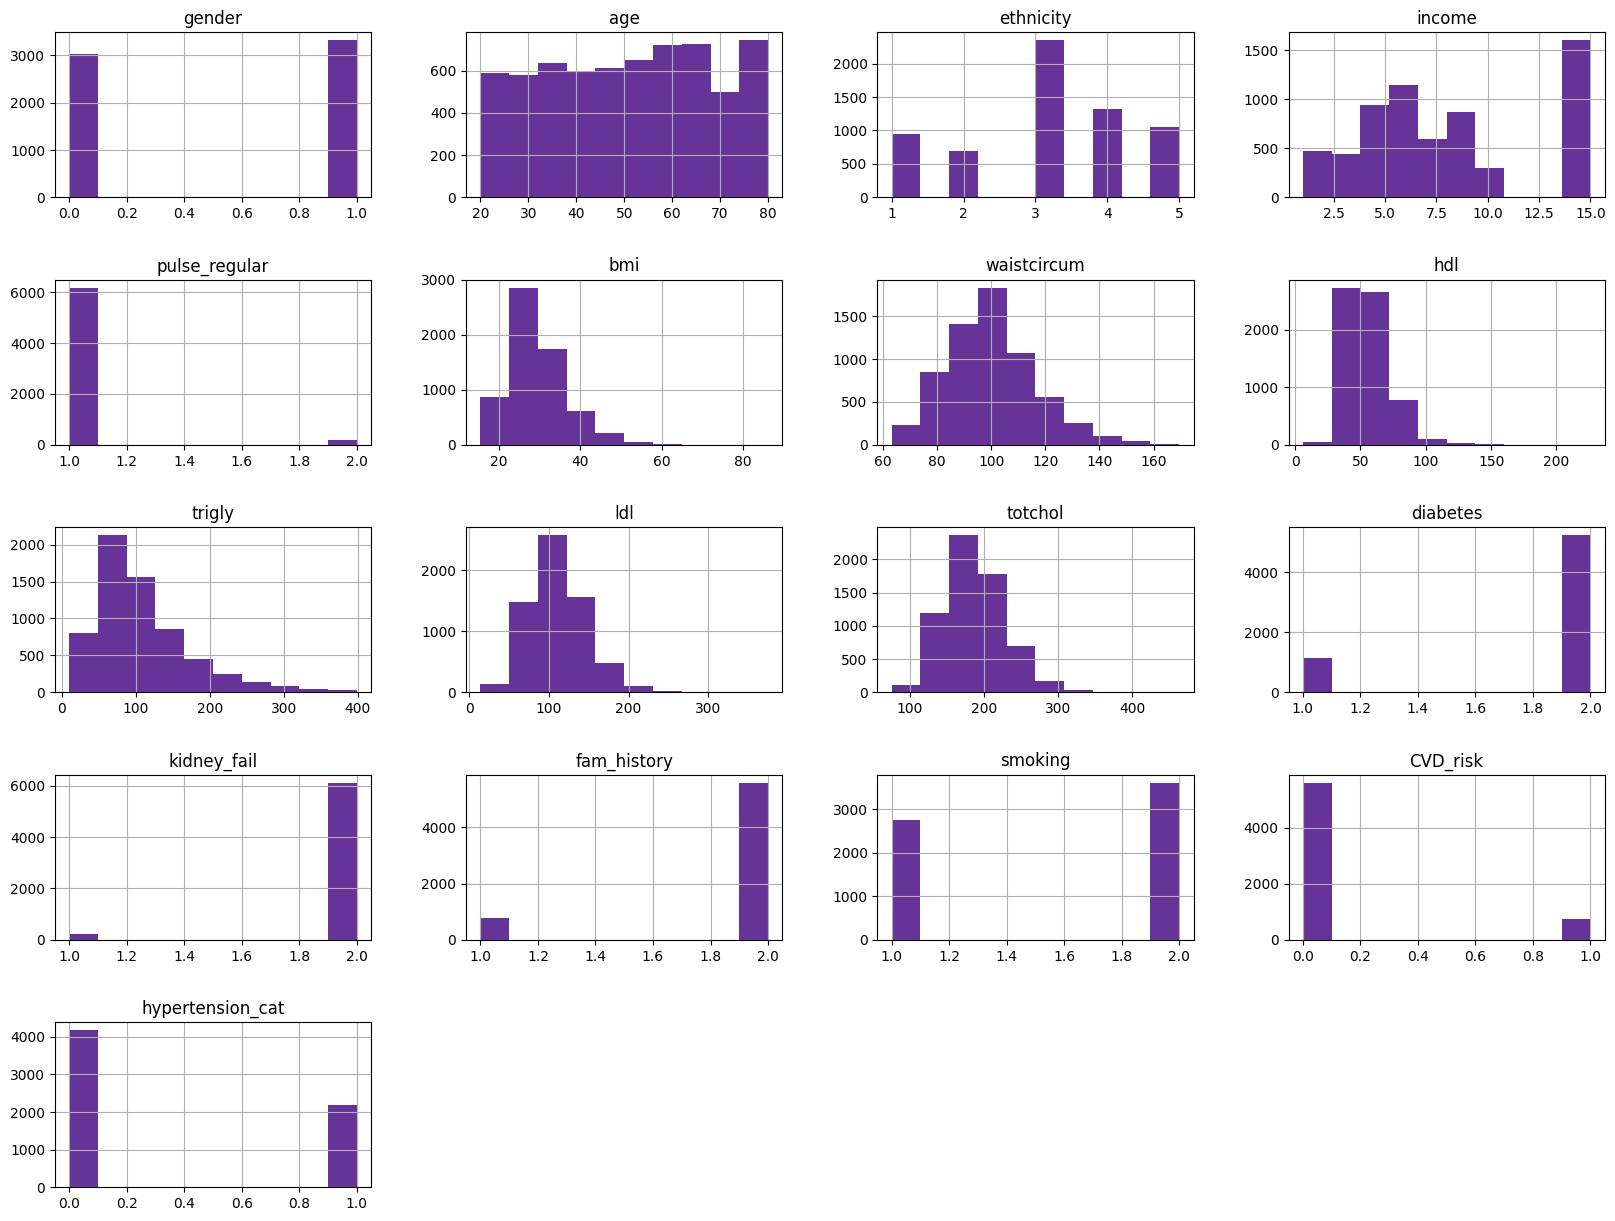

In [ ]:
#get the new histograms to get an idea of their distributions
cvd_df.hist(figsize=(20, 15), color='rebeccapurple')
plt.subplots_adjust(hspace=0.5)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.show()

In [ ]:
#setting up a datapath for our file
if not os.path.exists(LOCAL_DATA_PATH):
    os.mkdir(datapath)
datapath_cvd_data = os.path.join(LOCAL_DATA_PATH, 'cvd_data_cleaned.csv')
if not os.path.exists(datapath_cvd_data):
    cvd_df.to_csv(datapath_cvd_data, index=False)

### Now split into training and test data sets

In [ ]:
y = cvd_df['CVD_risk']
X = cvd_df.drop('CVD_risk',axis=1)

In [ ]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train,  X_val, y_train, y_val = train_test_split(X_train,y_train,  test_size=0.1, random_state=42)

In [ ]:
#confirming the ratios of train, test and validation sets for X
print('Percent heldout for training:', round(100*(len(X_train)/len(cvd_df)),0),'%')
print('Percent heldout for validation', round(100*(len(X_val)/len(cvd_df)),0),'%')
print('Percent heldout for testing:', round(100*(len(X_test)/len(cvd_df)),0),'%')

Percent heldout for training: 72.0 %
Percent heldout for validation 8.0 %
Percent heldout for testing: 20.0 %


In [ ]:
#confirming the ratios of train, test and validation sets for y
print('Percent heldout for training:', round(100*(len(y_train)/len(cvd_df)),0),'%')
print('Percent heldout for validation:', round(100*(len(y_val)/len(cvd_df)),0),'%')
print('Percent heldout for testing:', round(100*(len(y_test)/len(cvd_df)),0),'%')

Percent heldout for training: 72.0 %
Percent heldout for validation: 8.0 %
Percent heldout for testing: 20.0 %


# Exploratory Data Analysis

In [ ]:
y_train.value_counts(normalize=True)

0    0.880708
1    0.119292
Name: CVD_risk, dtype: float64

In [ ]:
y_val.value_counts(normalize=True)

0    0.880157
1    0.119843
Name: CVD_risk, dtype: float64

Our data is highly imbalanced with about 11% individuals with CVD risk. We may have to take this into account while modeling

In [ ]:
Xy_train = X_train.copy()
Xy_train['CVD_risk'] = y_train
Xy_grouped = Xy_train.groupby('CVD_risk')[['age',  'bmi', 'waistcircum',
                                   'hdl', 'trigly', 'ldl', 'totchol']].mean().reset_index()
Xy_grouped

,CVD_risk,age,bmi,waistcircum,hdl,trigly,ldl,totchol
0,0,48.553957,29.370702,99.326792,55.098239,107.155793,112.702059,189.229224
1,1,65.987179,30.772527,106.082051,52.000000,118.049451,98.245421,173.866300


In [ ]:
#def a function to plot barplots for the mean of grouped features
def barplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.3, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        barlist=ax.bar(x = 'CVD_risk', height = col, data=Xy_grouped)
        barlist[0].set_color('forestgreen')
        barlist[1].set_color('darkred')
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['No', 'Yes'], fontsize=14, color='black')
        ax.set_xlabel('CVD risk',fontsize=14, color='black')
        ax.set_ylabel(col, fontsize=14, color='black')
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [ ]:
features = [i for i in Xy_grouped.columns if i not in ['CVD_risk']]

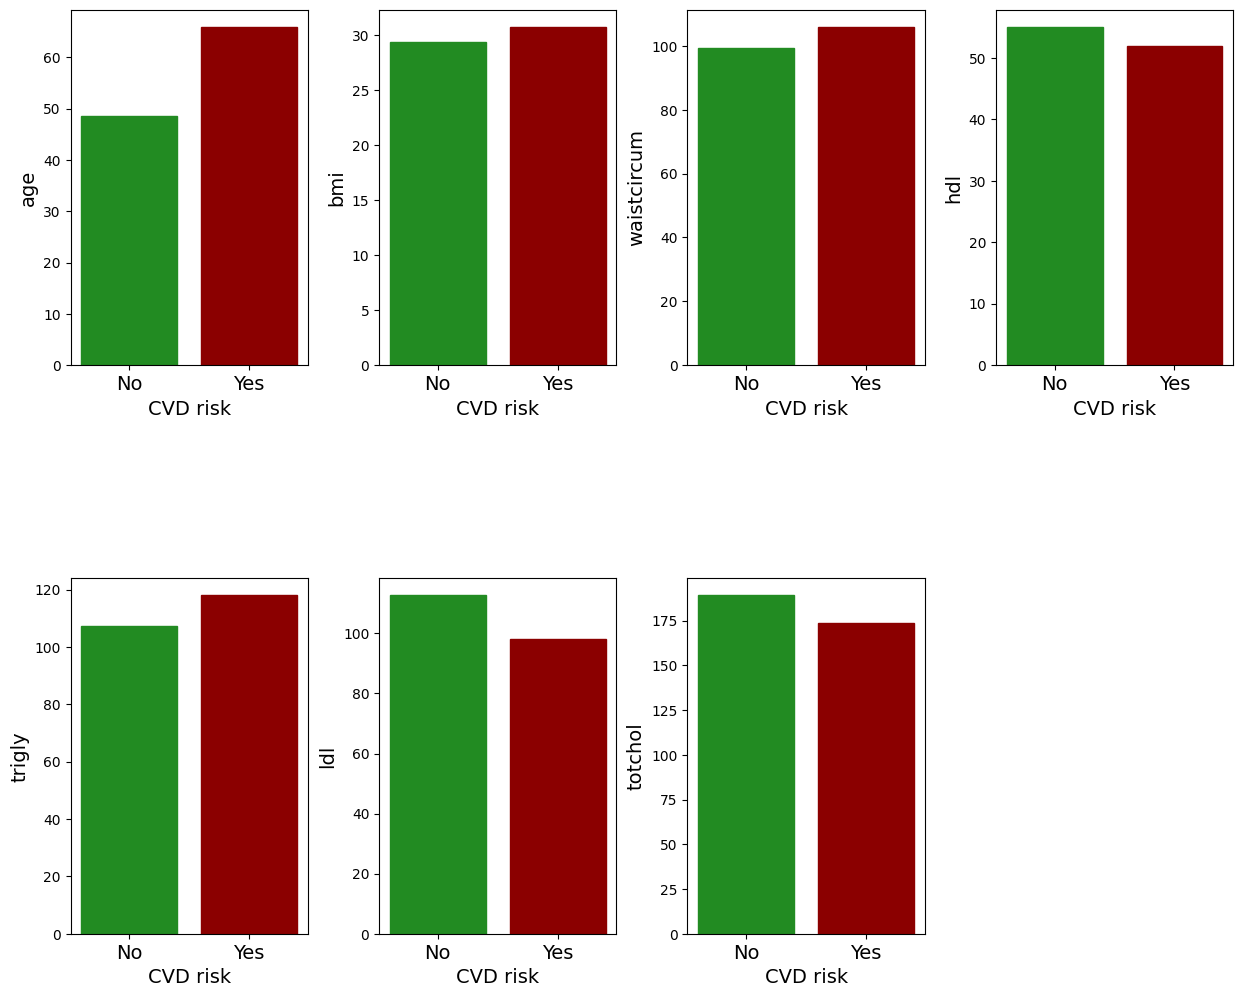

In [ ]:
barplots(features, ncol=4, figsize=(15, 12))

In [ ]:
Xy_train.columns

Index(['gender', 'age', 'ethnicity', 'income', 'pulse_regular', 'bmi',
       'waistcircum', 'hdl', 'trigly', 'ldl', 'totchol', 'diabetes',
       'kidney_fail', 'fam_history', 'smoking', 'hypertension_cat',
       'CVD_risk'],
      dtype='object')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'gender'),
  Text(0, 1.5, 'age'),
  Text(0, 2.5, 'bmi'),
  Text(0, 3.5, 'waistcircum'),
  Text(0, 4.5, 'hdl'),
  Text(0, 5.5, 'ldl'),
  Text(0, 6.5, 'trigly'),
  Text(0, 7.5, 'totchol'),
  Text(0, 8.5, 'diabetes'),
  Text(0, 9.5, 'kidney_fail'),
  Text(0, 10.5, 'fam_history'),
  Text(0, 11.5, 'smoking'),
  Text(0, 12.5, 'CVD_risk')])

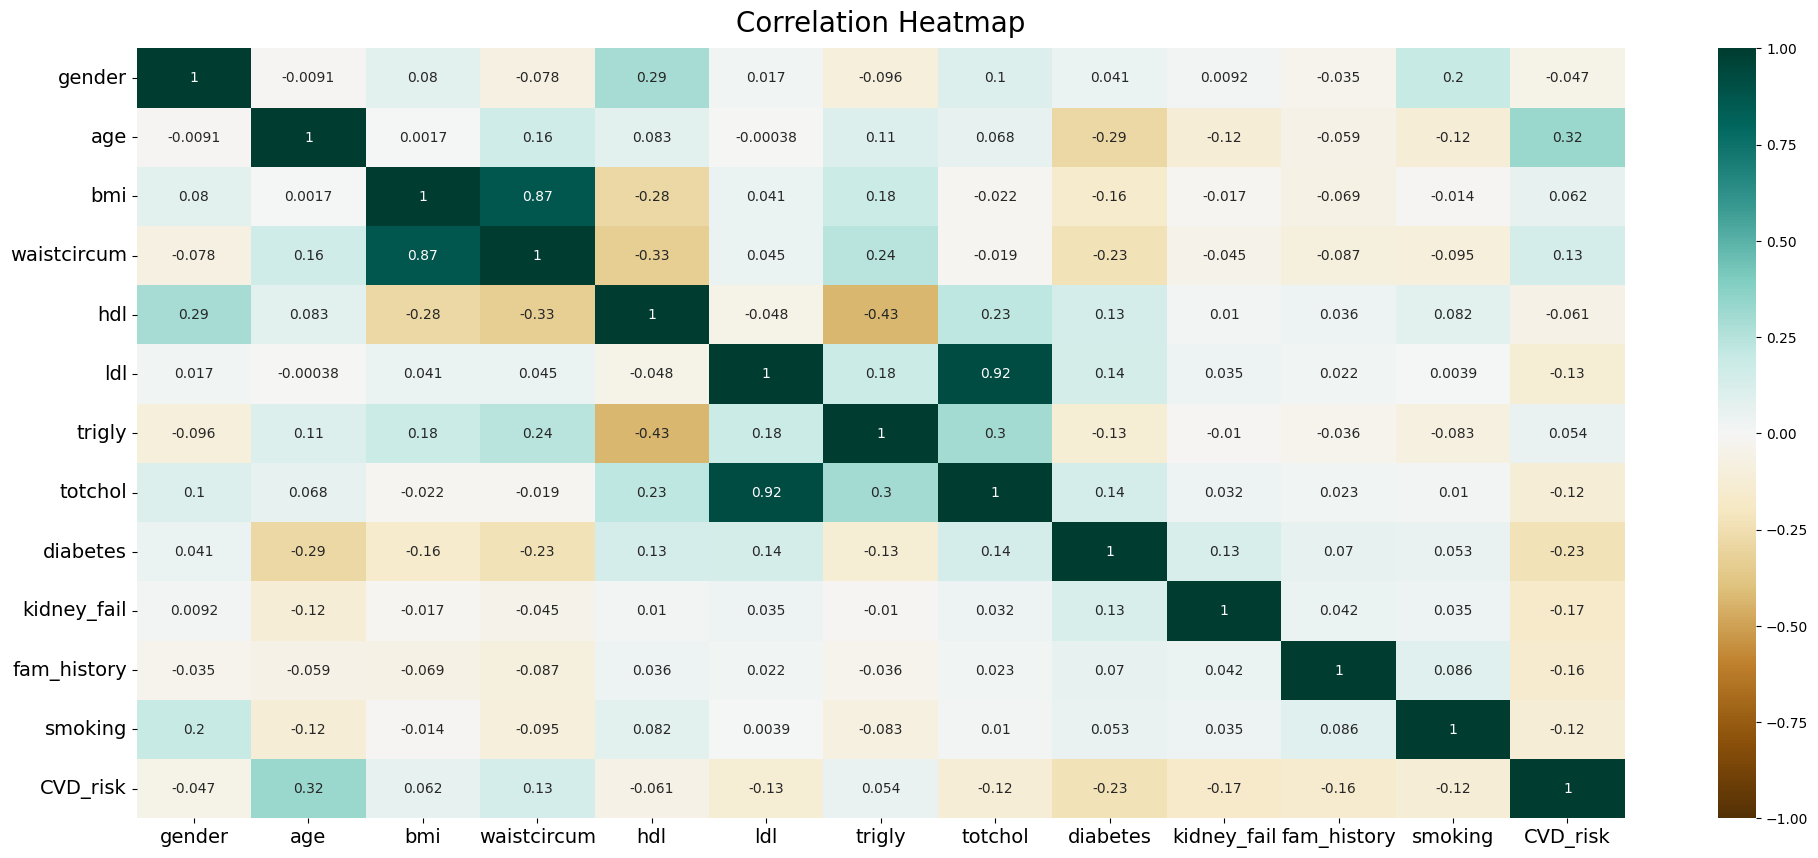

In [ ]:
# Adding heatmaps
corr = Xy_train[['gender', 'age',  'bmi', 'waistcircum', 'hdl', 'ldl', 'trigly', 'totchol',
               'diabetes', 'kidney_fail', 'fam_history', 'smoking', 'CVD_risk']].corr()
plt.figure(figsize=(24,10))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, cmap='BrBG', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)
plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')

### More graph and EDA needed (todo)

## Setup the pipeline to normalize values

### set missing values of numerical data to the median

In [ ]:
X_train.head()

,gender,age,ethnicity,income,pulse_regular,bmi,waistcircum,hdl,trigly,ldl,totchol,diabetes,kidney_fail,fam_history,smoking,hypertension_cat
3581,1,38,5,15,1,23.2,77.0,57,31,113,176,2,2,1,1,0
1083,0,38,1,7,1,30.1,92.2,45,136,162,234,2,2,2,2,1
5049,1,61,3,10,1,41.4,110.7,39,239,124,211,2,2,2,1,1
2722,0,76,1,5,1,34.5,118.5,36,126,93,154,1,1,2,1,1
3180,0,71,5,4,1,37.3,130.1,39,165,88,160,1,2,2,1,0


In [ ]:
X_train.columns

Index(['gender', 'age', 'ethnicity', 'income', 'pulse_regular', 'bmi',
       'waistcircum', 'hdl', 'trigly', 'ldl', 'totchol', 'diabetes',
       'kidney_fail', 'fam_history', 'smoking', 'hypertension_cat'],
      dtype='object')

In [ ]:
num_attribs = ['age', 'income', 'bmi', 'waistcircum', 'hdl', 'trigly', 'ldl', 'totchol']
cat_attribs = ["gender","ethnicity", "pulse_regular", 'diabetes', 'kidney_fail', 'fam_history', 'smoking', 'hypertension_cat']

#cvd_num = cvd_df.drop(cat_attribs,axis=1)

In [ ]:

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ])

In [ ]:

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ])
cvd_prepared = full_pipeline.fit_transform(X_train)

In [ ]:
cvd_prepared.shape

(4577, 27)

In [ ]:
cvd_prepared[1,0:27]

array([-0.71917475, -0.23343872,  0.07709673, -0.48497108, -0.5902748 ,
        0.42446544,  1.42836485,  1.14981402,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  1.        ])

### Create a dataframe from the prepared numpy array so we can view data

In [ ]:
cvd_df[cat_attribs].apply(pd.Series.value_counts)

,gender,ethnicity,pulse_regular,diabetes,kidney_fail,fam_history,smoking,hypertension_cat
0,3034.0,NaN,NaN,NaN,NaN,NaN,NaN,4176.0
1,3324.0,943.0,6176.0,1134.0,243.0,773.0,2746.0,2182.0
2,NaN,687.0,182.0,5224.0,6115.0,5585.0,3612.0,NaN
3,NaN,2352.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1323.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1053.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
column_names = num_attribs.copy()
column_names.extend(['Male','Female',
                     'Mexican','Hispanic','White','Black','Other',
                     'Pulse_regular', 'Pulse_irreg',
                     'diabetes','no_diabetes',
                     'kidney_fail', 'no_kidney_fail',
                     'fam_history', 'no_fam_hist',
                     'smoking', 'no_smoking',
                     'hypertension', 'no_hypertension'])
cvd_prepared_df = pd.DataFrame(cvd_prepared, columns=column_names)
cvd_prepared_df.T

,0,1,2,3,4,5,6,7,8,9,...,4567,4568,4569,4570,4571,4572,4573,4574,4575,4576
age,-0.719175,-0.719175,0.590113,1.443996,1.159368,-0.605324,-1.459207,-0.263770,0.134708,-1.174579,...,0.419336,1.102443,0.590113,0.305485,-0.776100,-0.946877,0.931666,-0.491473,0.305485,-0.206845
income,1.611498,-0.233439,0.458413,-0.694673,-0.925290,-0.233439,-0.464056,0.227795,-1.386524,-0.233439,...,1.611498,-1.155907,0.227795,1.611498,-0.233439,1.380881,-0.694673,-1.155907,-1.386524,1.611498
bmi,-0.869345,0.077097,1.627066,0.680625,1.064688,0.529743,-1.623754,-0.595014,-0.210951,-0.677313,...,-0.595014,-0.718463,0.214262,-0.005203,-0.156084,-1.280841,-0.320683,2.559791,3.108452,-0.114935
waistcircum,-1.414240,-0.484971,0.646048,1.122909,1.832089,0.823342,-1.995034,-0.833447,-0.258767,-0.821220,...,-0.686720,-0.277108,0.633820,-0.949606,-0.160950,-1.224718,-0.050904,2.174451,1.538635,-0.466630
hdl,0.137812,-0.590275,-0.954318,-1.136340,-0.954318,-1.014992,1.108595,-0.104884,1.169269,0.137812,...,1.958029,-0.286905,0.137812,0.016464,-0.347579,0.016464,-0.044210,-1.500383,-0.165557,-0.711623
trigly,-1.193592,0.424465,2.011703,0.270365,0.871357,1.657271,-0.977851,-0.161117,-0.515549,-0.900801,...,-0.084067,-0.515549,-1.054901,-0.361448,0.023804,-0.484729,-0.268988,1.996293,-0.022427,1.117919
ldl,0.056620,1.428365,0.364562,-0.503276,-0.643250,0.980448,-1.343120,-0.251323,1.036438,-0.671245,...,0.084614,-0.391297,0.028625,0.784484,1.148417,0.308573,1.484354,0.084614,-0.195334,1.008443
totchol,-0.281179,1.149814,0.582351,-0.823969,-0.675936,0.977108,-1.046020,-0.305851,1.223831,-0.823969,...,0.853747,-0.626591,-0.256507,0.582351,0.878419,0.113578,1.199159,0.113578,-0.256507,0.952436
Male,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Female,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000


#  Data Modeling

### Stochastic Gradient Descent

In [ ]:

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(cvd_prepared, y_train)

SGDClassifier(random_state=42)

In [ ]:
some_data = cvd_prepared[5]
some_labels = y_train.iloc[5]
sgd_clf.predict([some_data])

array([0])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, cvd_prepared, y_train, cv=3, scoring="accuracy")

array([0.88269987, 0.88335518, 0.88      ])

## Confusion Matrix

### Exercise : Construct a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, cvd_prepared, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[3941,   90],
       [ 450,   96]])

### Exercise : Provide your thoughts on the numbers in the confusion matrix, including an analysis of why things may not be working out so well.

**True Positives (TP)**: This is the count of instances that were correctly predicted as positive- 102

**True Negatives (TN)**: These are the instances correctly predicted as negative- 4383

**False Positives (FP)**: These are instances that were actually negative but were wrongly predicted as positive. Also known as Type I errors- 134

**False Negatives (FN)**: These are instances that were actually positive but were wrongly predicted as negative. Also known as Type II errors- 500


the model correctly predicted 4383 instances as negative.
You have 102 True positives, indicating that 102 instances were correctly predicted as positives.
There are 134 False Positives, indicating that 134 instances were wrongly classified as positive when they were actually negative.
500 False Negatives, meaning 500 instances were incorrectly predicted as negative when they were positive.

nsufficient Data: The model might not have enough data to learn meaningful patterns. we should collect more data or use data augmentation techniques.

Data Quality: Poor data quality, including missing values, outliers, or errors, can lead to incorrect predictions.

Incorrect Features: If the features used for training the model are not relevant or don't capture the underlying patterns in the data, the model's performance can suffer.

Identifying the specific reason(s) for poor model performance requires a systematic analysis of the data, model, and training process. Experimentation, iteration, and continuous monitoring are key to improving model performance.

## Precision and Recall

### Exercise : Calculate the Precision, Recall, and F1-score

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)


0.5161290322580645

In [ ]:
recall_score(y_train, y_train_pred)

0.17582417582417584

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.26229508196721313

### Provide your thoughts on precision, recall, and F1-score, including an analysis of why things may not be working out so well.

Precision (0.432): Out of all the positive predictions made by the model, approximately 43.2% are correct.

Recall (0.169):  The model is only identifying about 16.9% of all the actual positive cases and it's missing a significant portion of positive instances.

F1-Score (0.243): The model achieves a moderate balance between precision and recall. However, it's not particularly high, there is room for improvement in both precision and recall.

To improve precision, recall, and the F1-score, a combination of these factors should be explored and addressed systematically. It's often an iterative process of experimentation, model refinement, and data enhancement to achieve better classification results.

## Precision/Recall Trade-off

### Exercise : Construct a graph of the Precision and Recall values as the threshold changes  

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3,
                             method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  [...]

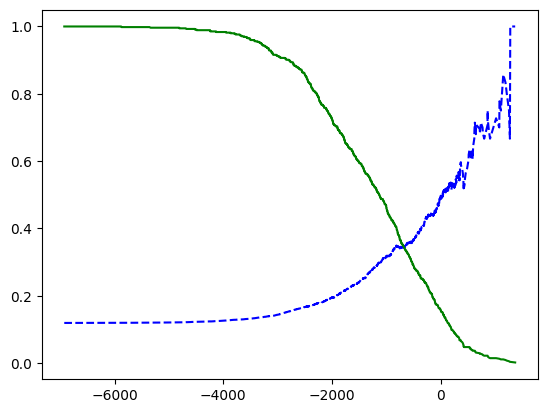

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### Exercise : Why does the precision curve look jagged ?
A jagged or irregular precision curve will occur when there are fluctuations or inconsistencies in the precision values at different decision thresholds. The reasons may be:

Class Imbalance: In imbalanced datasets where one class significantly outnumbers the other, small changes in the number of true positives or false positives can lead to substantial fluctuations in precision. Since precision is calculated as TP / (TP + FP), minor variations in either TP or FP can result in jaggedness.

Threshold Sensitivity: As moving the threshold along the probability scale, the number of true positives and false positives can change abruptly, causing precision to vary irregularly.

Noisy Data: If the dataset contains noise or uncertainty, it can lead to unpredictable variations in model predictions and consequently affect precision.

Small Sample Sizes: In scenarios with small sample sizes, precision can be less stable because a single incorrect prediction can have a significant impact on the metric.

Ultimately, the presence of jaggedness in the precision curve is an indication of the intricacies and challenges in the data and model.

## The ROC Curve

### Exercise : Construct and ROC curve

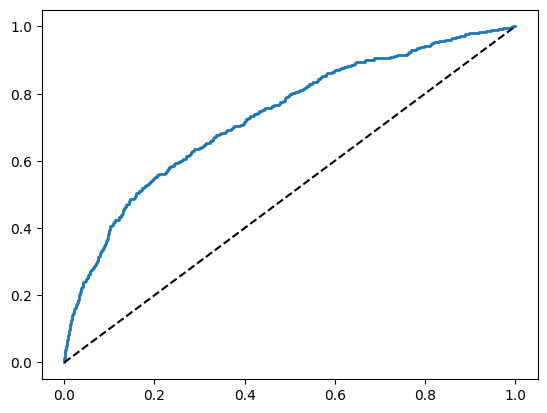

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr,tpr,linewidth=2, label=label)
  plt.plot([0,1],[0,1],'k--')
  [...]

plot_roc_curve(fpr,tpr)
plt.show()

### Graduate Students/Extra Credit : Choose another modeling technique, compare results on the ROC curve

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# Initialize logistic regression model
tModel = DecisionTreeRegressor()

# Train the model
tModel.fit(X = X_train,y = y_train)

# Make predictions
tree_count_preds = tModel.predict(X=X_train)
tree_mse = mean_squared_error(y_train, tree_count_preds)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
print ("RMSLE Value For Decision Tree Regressor: ",tree_rmse)

RMSLE Value For Decision Tree Regressor:  0.0


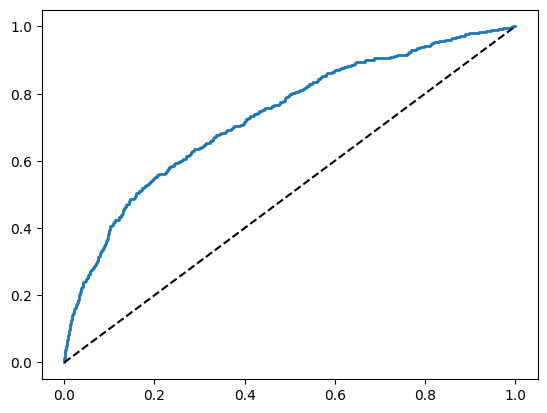

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr,tpr,linewidth=2, label=label)
  plt.plot([0,1],[0,1],'k--')
  [...]

plot_roc_curve(fpr,tpr)
plt.show()